# Part I - Analysis of the Factors Contributing to Loan Status Outcome.
## by Freda Victor

## Introduction
> For this analysis, I would be using the Loan Data by Prosper. The dataset contains 113,937 observations with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.


## Preliminary Wrangling


In [52]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [53]:
# Load the dataset
loan = pd.read_csv('prosperLoanData.csv')
loan.head(1)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258


In [54]:
# high-level overview of the loan data shape and composition
print(loan.shape)
print(loan.info())

(113937, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  

### What is the structure of your dataset?

> There are 113937 entries and 81 columns in the dataset. Of the 113937 entries, there are 61 numeric variables, 3 boolean and 17 catergorical variables. Some variables at a glance that caught my interest are the loan_status, employment_status, income_range and investors. For the analysis I would be exploring about 10 - 15 of the variables of interest.


### What is/are the main feature(s) of interest in your dataset?

> I am most interested in what factors affect a loan’s outcome status in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that income would play a significant role in loan's outcome status as well as employment status. The high income or being employed would mean more likely to have a completed loan status. I also think that other variables like investors, borrowers_rate, listing_categories and is_borrower_homeowner would have a signicant effect on loan's outcome status.

## Univariate Exploration


### Exploring the data and identifying variables of interest

In [55]:
# Creating a dataframe of variables of interest
loan_subset = loan[['ListingNumber', 'Term', 'LoanStatus', 
                    'BorrowerAPR', 'BorrowerRate', 'ListingCategory (numeric)', 
                    'BorrowerState', 'EmploymentStatus', 'IsBorrowerHomeowner', 
                    'CreditScoreRangeUpper', 'DebtToIncomeRatio',
                    'IncomeRange','LoanOriginalAmount','Recommendations', 'Investors']]

In [56]:
#Explore the datatypes and count of values in the variables
loan_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingNumber              113937 non-null  int64  
 1   Term                       113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   BorrowerAPR                113912 non-null  float64
 4   BorrowerRate               113937 non-null  float64
 5   ListingCategory (numeric)  113937 non-null  int64  
 6   BorrowerState              108422 non-null  object 
 7   EmploymentStatus           111682 non-null  object 
 8   IsBorrowerHomeowner        113937 non-null  bool   
 9   CreditScoreRangeUpper      113346 non-null  float64
 10  DebtToIncomeRatio          105383 non-null  float64
 11  IncomeRange                113937 non-null  object 
 12  LoanOriginalAmount         113937 non-null  int64  
 13  Recommendations            11

In [57]:
# descriptive statistics for numeric variables
loan_subset.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,ListingCategory (numeric),CreditScoreRangeUpper,DebtToIncomeRatio,LoanOriginalAmount,Recommendations,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,113346.000000,105383.000000,113937.00000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,2.774209,704.567731,0.275947,8337.01385,0.048027,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,3.996797,66.458275,0.551759,6245.80058,0.332353,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,0.000000,19.000000,0.000000,1000.00000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,1.000000,679.000000,0.140000,4000.00000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,1.000000,699.000000,0.220000,6500.00000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,3.000000,739.000000,0.320000,12000.00000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,20.000000,899.000000,10.010000,35000.00000,39.000000,1189.000000


In [58]:
#Change column name from CreditScoreRangeUpper to CreditScore 
loan_subset.rename(columns = {'CreditScoreRangeUpper':'CreditScore'}, inplace = True)

/Users/fredavictor/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


### Starting the univariate exploration by looking at the distribution of the main variable of interest: **LoanStatus**.

#### What is the count of LoanStatus?

In [59]:
#Getting the observations of LoanStatus
loan_subset['LoanStatus'].value_counts().index

Index(['Current', 'Completed', 'Chargedoff', 'Defaulted',
       'Past Due (1-15 days)', 'Past Due (31-60 days)',
       'Past Due (61-90 days)', 'Past Due (91-120 days)',
       'Past Due (16-30 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)', 'Cancelled'],
      dtype='object')

In [60]:
#Group all 'past due' observations in LoanStatus variable for cleaner plotting 
loan_subset[loan_subset['LoanStatus'].str.startswith('Past')]

,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory (numeric),BorrowerState,EmploymentStatus,IsBorrowerHomeowner,CreditScore,DebtToIncomeRatio,IncomeRange,LoanOriginalAmount,Recommendations,Investors
12,1081604,36,Past Due (1-15 days),0.17969,0.1435,1,AL,Employed,False,699.0,0.18,"$25,000-49,999",4000,0,1
82,843206,36,Past Due (16-30 days),0.33286,0.2932,7,NY,Employed,False,619.0,0.12,"$50,000-74,999",4000,0,1
139,571141,36,Past Due (1-15 days),0.33973,0.2999,2,KY,Other,False,619.0,0.41,"$1-24,999",2500,0,25
508,516170,36,Past Due (61-90 days),0.30532,0.2699,1,MO,Employed,False,739.0,0.13,"$25,000-49,999",4500,0,64
597,604010,60,Past Due (61-90 days),0.17849,0.1551,1,TX,Employed,True,799.0,0.30,"$50,000-74,999",23500,0,243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113697,539329,36,Past Due (1-15 days),0.28728,0.2487,13,MD,Employed,False,619.0,0.28,"$75,000-99,999",4000,0,17
113700,652901,36,Past Due (1-15 days),0.27285,0.2346,1,DE,Employed,True,639.0,0.22,"$100,000+",12500,0,168
113748,817662,36,Past Due (91-120 days),0.31790,0.2786,2,NY,Other,True,679.0,0.10,"$50,000-74,999",4000,0,54
113769,851919,36,Past Due (31-60 days),0.31790,0.2786,1,NJ,Employed,True,659.0,0.20,"$75,000-99,999",2600,0,4


In [61]:
# Function to group 'past due'
def past_due(phrase):
    i = phrase
    if i.startswith('Past'):
        return 'Past Due'
    else:
        return phrase

In [62]:
# Apply function
loan_subset['LoanStatus'] = loan_subset['LoanStatus'].apply(past_due)

/var/folders/xk/yng4j7rx54ng38j5cbdsvxt40000gn/T/ipykernel_745/2237191447.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_subset['LoanStatus'] = loan_subset['LoanStatus'].apply(past_due)


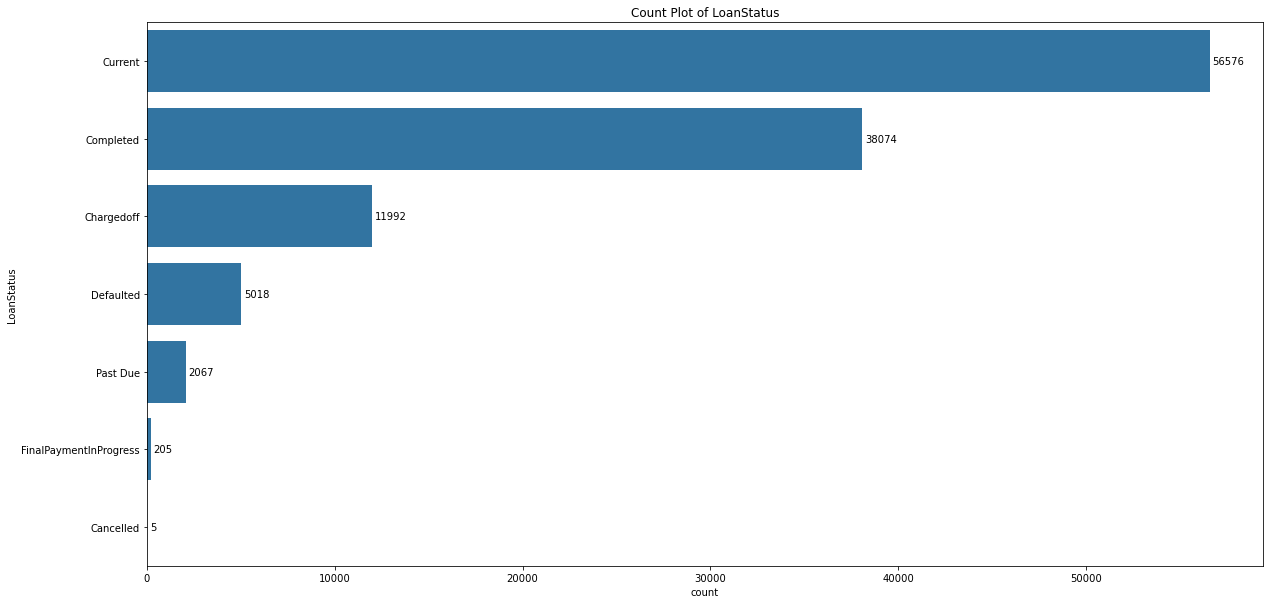

In [63]:
#Plot LoanStatus count
loan_count= loan_subset['LoanStatus'].value_counts()
loan_order= loan_count.index

plt.figure(figsize=[20,10])
base_color= sb.color_palette()[0]
sb.countplot(data=loan_subset, 
             y='LoanStatus', 
             order = loan_order,
             color=base_color);
plt.title('Count Plot of LoanStatus')

for item in range(loan_count.shape[0]):
    count = loan_count[item]
    count_string= '{}'.format(count)
    plt.text(count+150, item, count_string, va='center')

##### Observation:
From the countplot of LoanStatus, the highest distribution of the data is the current status with 56576 counts followed by completed status with 38074 counts then the chargeoff with 11992 counts.

### Explore other variables in the dataset

#### What is the distribution of  **BorrowerRate**, **BorrowerAPR** and **DebtToIncome** variables?

/var/folders/xk/yng4j7rx54ng38j5cbdsvxt40000gn/T/ipykernel_745/2806851958.py:22: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim((0,1));


Text(0.5, 1.0, 'Distribution of DebtToIncomeRatio')

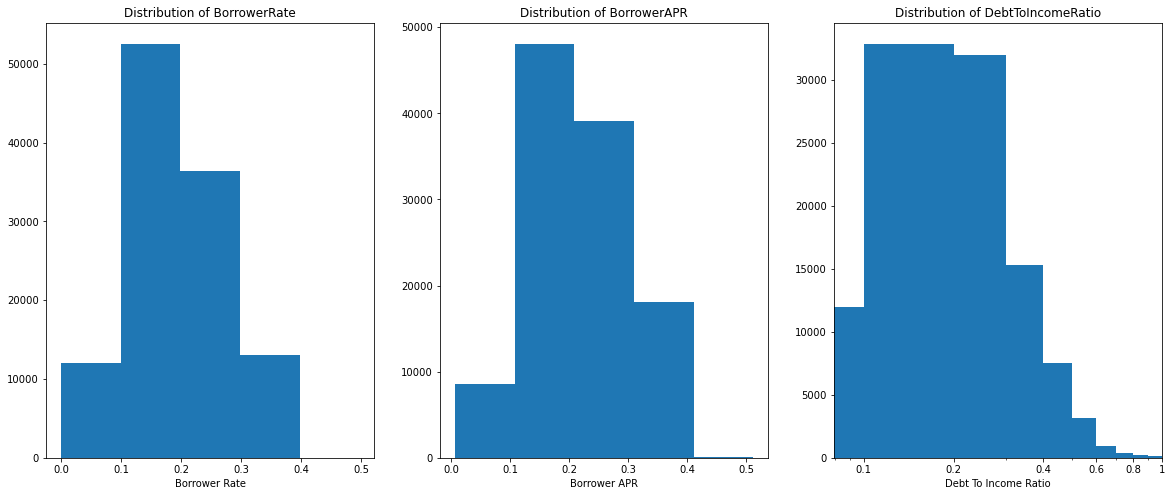

In [64]:
plt.figure(figsize = [20,8])
# First histogram: BorrowerRate
plt.subplot(1,3,1)
plt.hist(data=loan_subset, x='BorrowerRate', bins=5)
plt.xlabel('Borrower Rate')
plt.title('Distribution of BorrowerRate')

# Second histogram: BorrowerAPR
plt.subplot(1,3,2)
plt.hist(data=loan_subset, x='BorrowerAPR', bins=5)
plt.xlabel('Borrower APR')
plt.title('Distribution of BorrowerAPR')

# Third histogram: DebtToIncomeRatio
plt.subplot(1,3,3)
bins = np.arange(0, loan_subset['DebtToIncomeRatio'].max()+0.1, 0.1)
ticks = [0.1,0.2,0.4,0.6,0.8,1]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data=loan_subset, x='DebtToIncomeRatio', bins=bins);
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlim((0,1));
plt.xlabel('Debt To Income Ratio')
plt.title('Distribution of DebtToIncomeRatio')

##### Observation:
The BorrowerRate, BorrowerAPR and DebetToIncomeRation both have the highest distribution between 0.1 - 0.2

#### What is the count of **ListCategory**?

In [65]:
#Create a function to swap listing category values with its meaning
listing_category = {0:'Not Available', 1:'Debt Consolidation',2:'Home Improvement', 
                   3:'Business', 4:'Personal Loan', 5:'Student Use', 6:'Auto', 7:'Other', 
                   8:'Baby&Adoption', 9:'Boat', 10:'Cosmetic Procedure', 
                   11:'Engagement Ring', 12:'Green Loans', 13:'Household Expenses', 
                   14:'Large Purchases', 15:'Medical/Dental', 16:'Motorcycle', 17:'RV', 
                   18:'Taxes', 19:'Vacation', 20:'Wedding Loans'}
def swap_dict(lcat):
    return listing_category[lcat]

In [66]:
# Apply function
loan_subset['ListingCategory (numeric)'] = loan_subset['ListingCategory (numeric)'].apply(swap_dict)

/var/folders/xk/yng4j7rx54ng38j5cbdsvxt40000gn/T/ipykernel_745/3088705716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_subset['ListingCategory (numeric)'] = loan_subset['ListingCategory (numeric)'].apply(swap_dict)


In [67]:
#Rename the column name to ListingCategory
loan_subset.rename(columns = {'ListingCategory (numeric)':'ListingCategory'}, inplace = True)

/Users/fredavictor/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


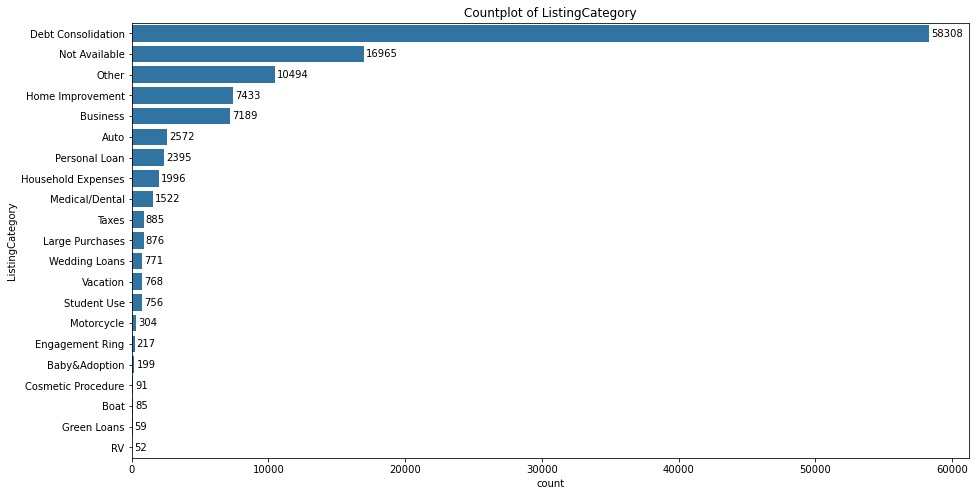

In [68]:
#Countplot for ListingCategory
listingcat_count= loan_subset['ListingCategory'].value_counts()
listingcat_order = listingcat_count.index

plt.figure(figsize = [15,8])
sb.countplot(data=loan_subset, y='ListingCategory', 
             order = loan_subset['ListingCategory'].value_counts().index, color=base_color);
plt.title('Countplot of ListingCategory')

for item in range(listingcat_count.shape[0]):
    count = listingcat_count[item]
    count_string= '{}'.format(count)
    plt.text(count+150, item, count_string, va='center')

#### Observation:
Debt consolidation is the most selected listing posted by borrowers with a count of 58308. Honourable mentions are home improvement (7433) and business (7189).

#### What are the counts of **BorrowerState**, **EmploymentStatus**, **IncomeRange** and **IsBorrowerHomeowner**?

In [69]:
#Transform the EmploymentStatus variable by creating a function to group all employment status
def employed(phrase):
    employed = ['Self-employed','Full-time','Part-time','Employed','employed']
    i = phrase
    if i in employed:
        return 'Employed'
    else:
        return phrase

In [70]:
#Apply function
loan_subset['EmploymentStatus'] = loan_subset['EmploymentStatus'].apply(employed)

/var/folders/xk/yng4j7rx54ng38j5cbdsvxt40000gn/T/ipykernel_745/3957158832.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_subset['EmploymentStatus'] = loan_subset['EmploymentStatus'].apply(employed)


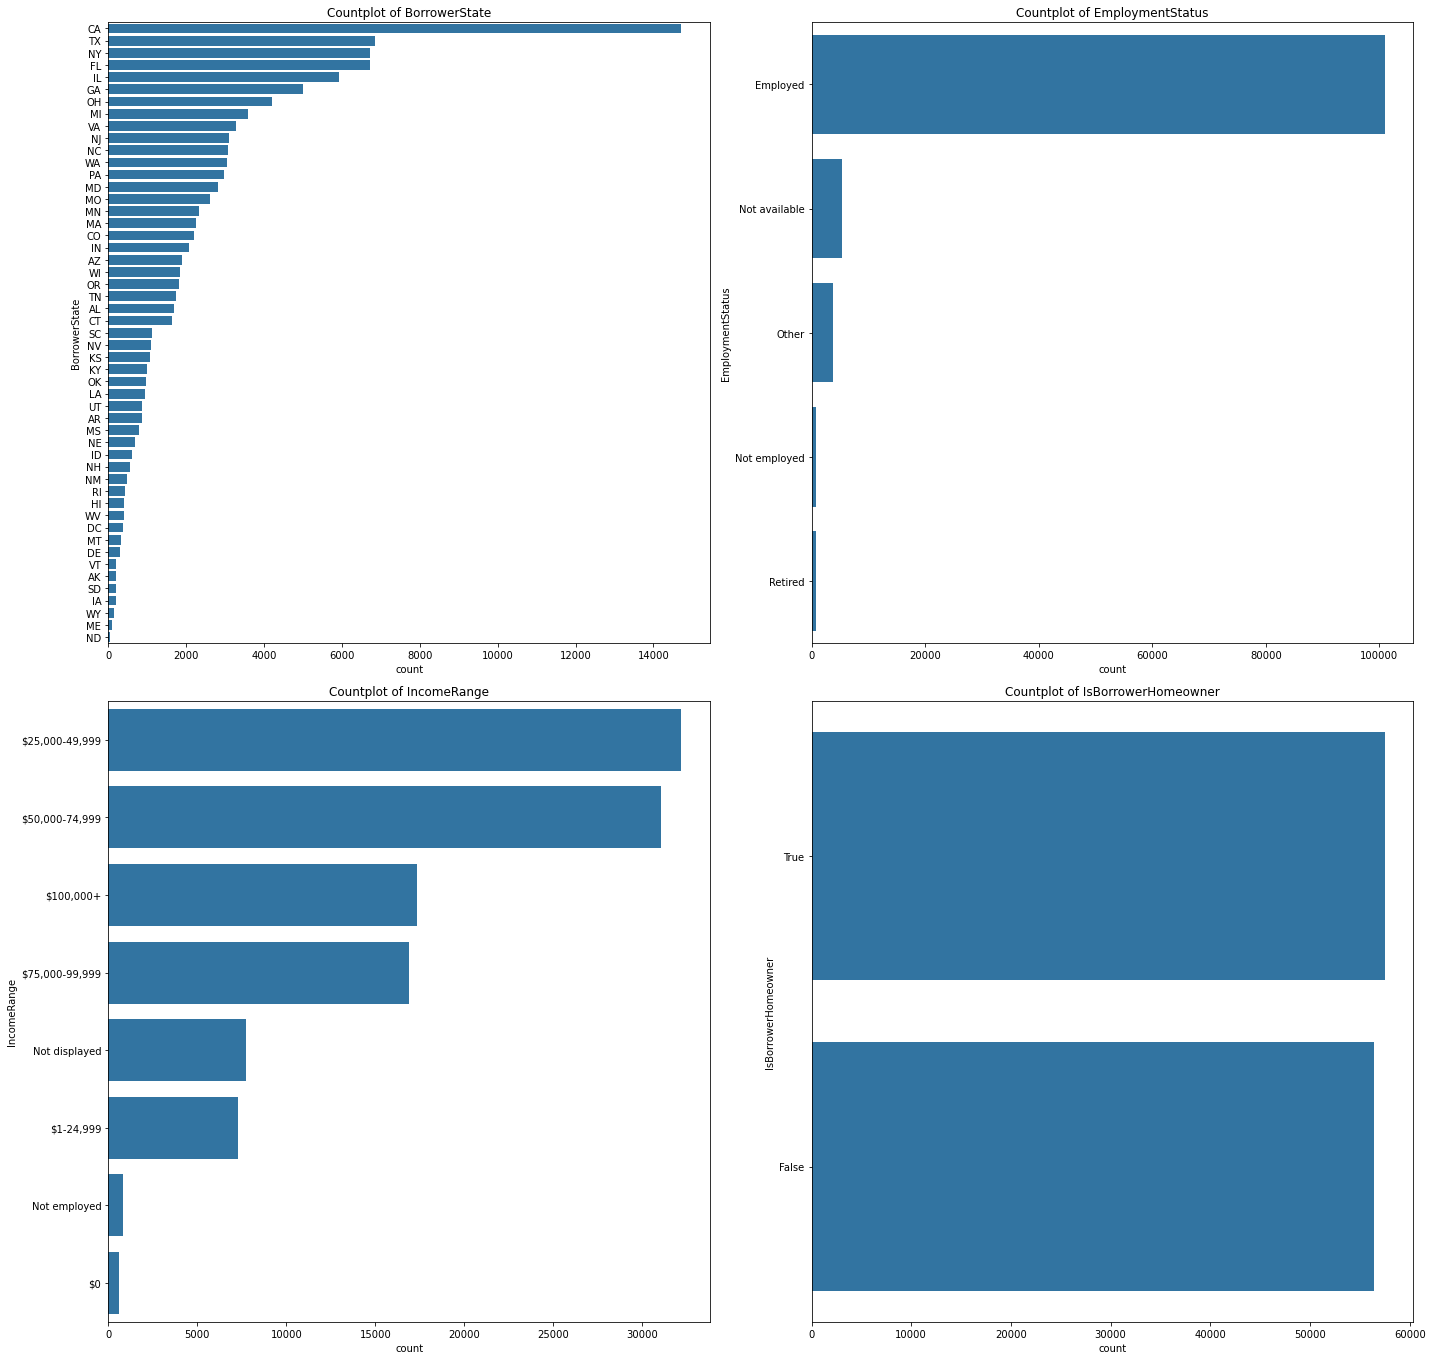

In [71]:
#Countplot for BorrowerState, EmployementStatus, IncomeRange and IsBorrowerHomeowner
###implement with while loop###
plt.figure(figsize = [20, 19]) 
n_index=0
n_list= ['BorrowerState', 'EmploymentStatus', 'IncomeRange', 'IsBorrowerHomeowner']
while n_index<4:
    plt.subplot(2, 2, n_index+1)
    sb.countplot(data=loan_subset, y=n_list[n_index],
                 order = loan_subset[n_list[n_index]].value_counts().index,color=base_color)
    plt.tight_layout()
    plt.title(f'Countplot of {n_list[n_index]}')
    n_index+= 1

##### Observations:
1. *Borrower's State* has the highest borrowers from California, almost twice as much from the second borrower state Texas.
2. In *Employment Status*, we can see that most borrowers are employed.
3. For Borrower's *Income Range*, highest income range is 25,000 - 49,999 followed by 50,000 - 74,999.
4. From *IsBorrowerHomeOwner*, we can see that there are more borrowers who own a home than those who do not own a home.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> My variable of interest has its highest distribution in the current status followed by completed status counts then the chargeoff. LoanStatus had different past due observations such as (past due 1-15 days, past due 31-60 days etc) which I had to group into an overall past due for cleaner plotting.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Of the features investigated see below the operations done:

  - DebtToIncomeRatio: The data is overly skewed to the right, so I used a log scale and set the x-limits to show points of interest.This made the data have a normal distribution for exploration.
    
- ListingCategory: I swapped the listing category values with its meaning to better understand what the values represented e.g 1 for debt consolidation. 
    
- EmploymentStatus: I tidied the EmploymentStatus variable by grouping all employment status (full-time, part-time, self-employed etc) to employed for cleaner plotting.


## Bivariate Exploration

### To start off with, I want to look at the pairwise correlations present between numerical variables in the data.


#### What **numerical variables** are correlated with one another?

In [72]:
# Get stats of numeric variables
loan_subset.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,CreditScore,DebtToIncomeRatio,LoanOriginalAmount,Recommendations,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113346.000000,105383.000000,113937.00000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,704.567731,0.275947,8337.01385,0.048027,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,66.458275,0.551759,6245.80058,0.332353,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,19.000000,0.000000,1000.00000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,679.000000,0.140000,4000.00000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,699.000000,0.220000,6500.00000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,739.000000,0.320000,12000.00000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,899.000000,10.010000,35000.00000,39.000000,1189.000000


In [73]:
# Create a list of numeric variables
numeric_variables = ['Term', 'BorrowerAPR', 'BorrowerRate','DebtToIncomeRatio',
                     'Investors','Recommendations','CreditScore','LoanOriginalAmount']

Text(0.5, 1.1, 'Correlation Heatmap Plot of Term, BorrowerAPR, LoanOriginalAmount, BorrowerRate\nDebtToIncomeRatio, Investors, Recommendations and CreditScore')

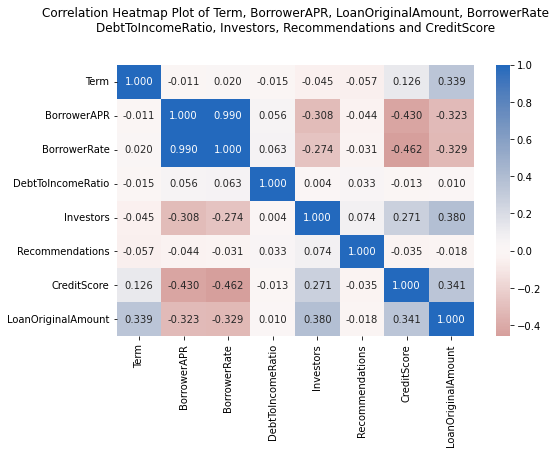

In [74]:
# correlation heatmap plot
plt.figure(figsize = [8, 5])
sb.heatmap(loan_subset[numeric_variables].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Heatmap Plot of Term, BorrowerAPR, LoanOriginalAmount, BorrowerRate\nDebtToIncomeRatio, Investors, Recommendations and CreditScore', y=1.1)

Text(0.5, 0.98, 'Correlation PairGrid Plot of Term, BorrowerAPR, BorrowerRate, LoanOriginalAmount, DebtToIncomeRatio, Investors, Recommendations and CreditScore.')

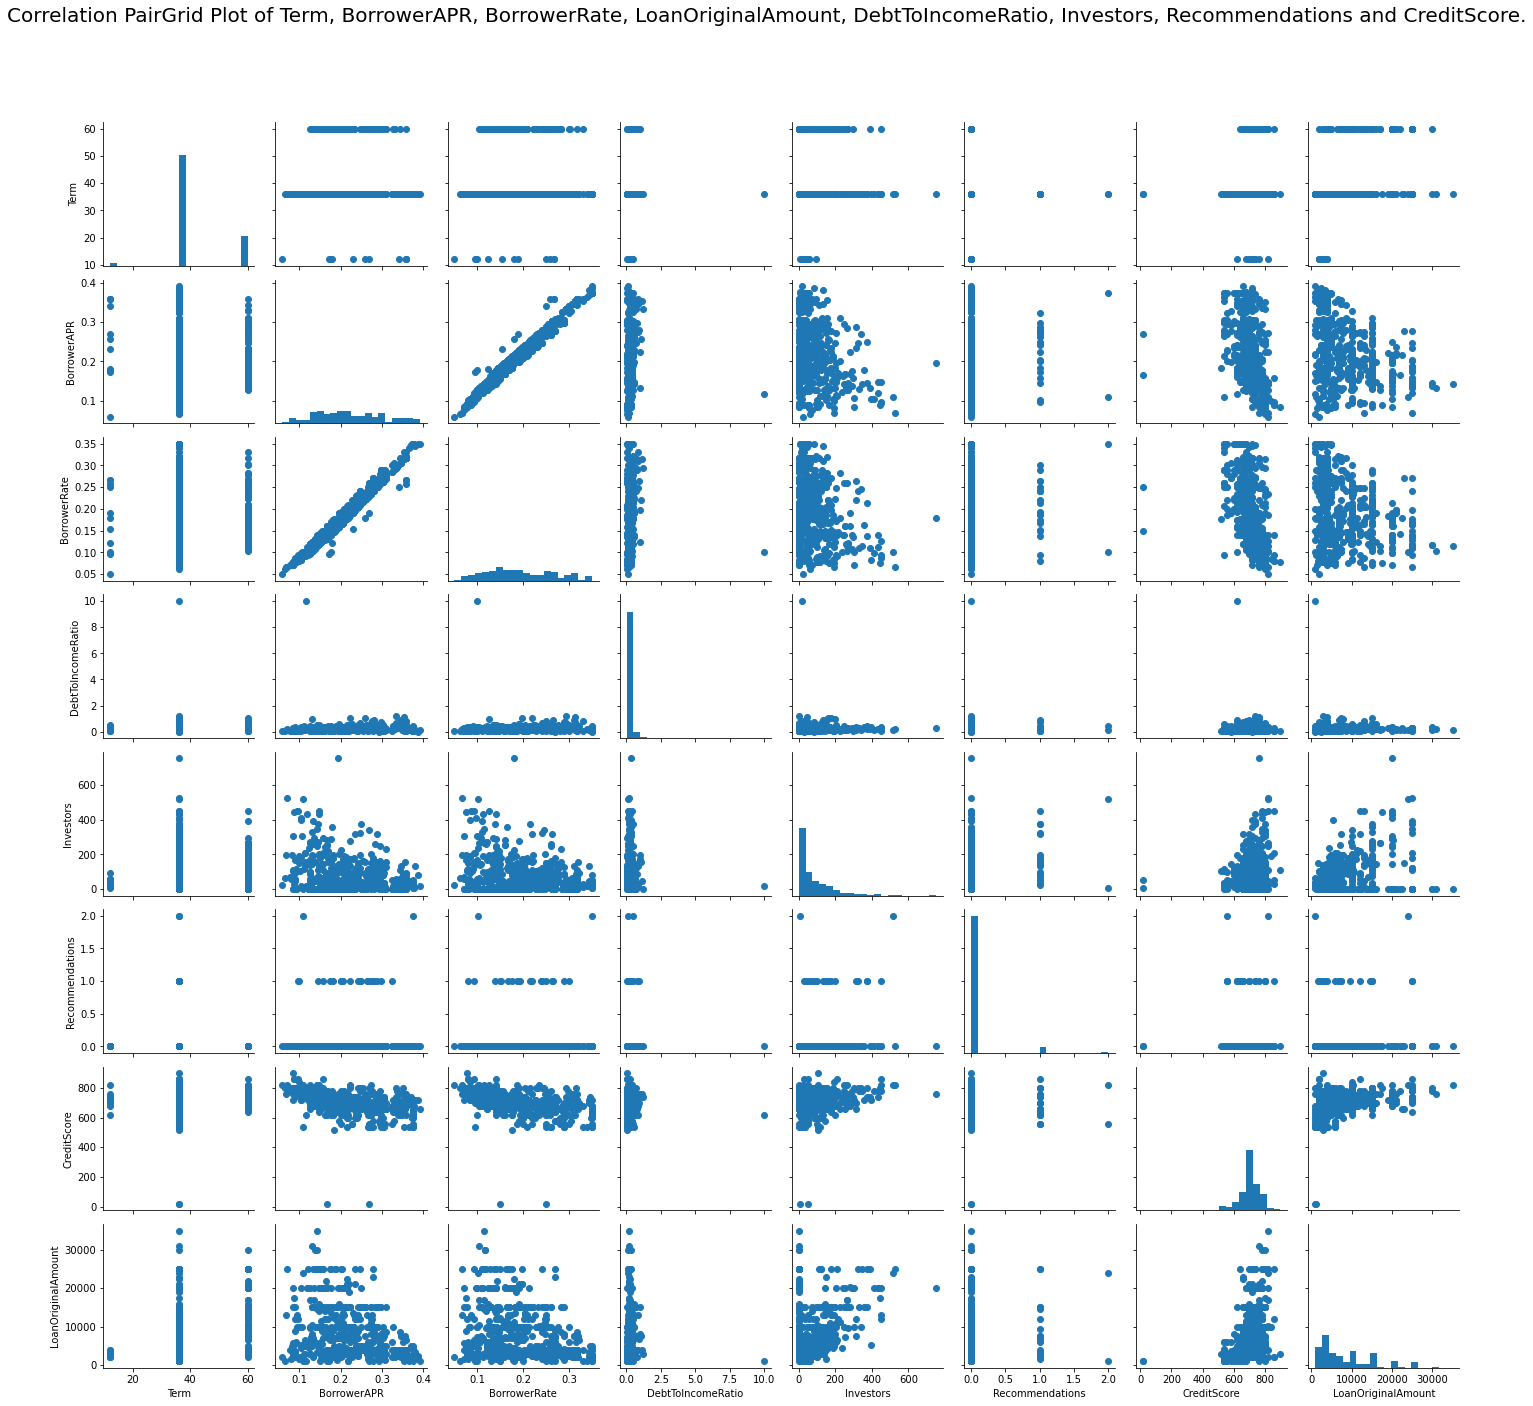

In [75]:
#Correlation PairGrid plot
data_sample = np.random.choice(loan_subset.shape[0], 500, replace = False)
loan_samp = loan_subset.loc[data_sample,:]

g = sb.PairGrid(data = loan_samp, vars = numeric_variables)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Correlation PairGrid Plot of Term, BorrowerAPR, BorrowerRate, LoanOriginalAmount, DebtToIncomeRatio, Investors, Recommendations and CreditScore.', fontsize=20)

##### Observations:
1. *BorrowerRate* and *BorrowerAPR* have very strong positive correlation.
2. Both *BorrowerRate* and *BorrowerAPR* have strong negative correlation with *CreditScore*.
3. Both *BorrowerRate* and *BorrowerAPR* have a negative correlation with *Investors*.
4. *Investors* and *CreditScore* have weak positive correlation.
5. *Term* and *CreditScore* have weak positive correlation.
6. *DebtToIncomeRatio* and *BorrowerRate* have very weak positive correlation.
7. *Investors*, *CreditScore* and *Term* have positive correlation with *LoanOriginalAmount* 
8. Both *BorrowerRate* and *BorrowerAPR* have a negative correlation with *LoanOriginalAmount*.


### Show the relationships between the main categorical variable **LoanStatus** and other variables.

#### What is the relationship between **LoanStatus** and two numeric variables **BorrowerRate** and **CreditScore**?

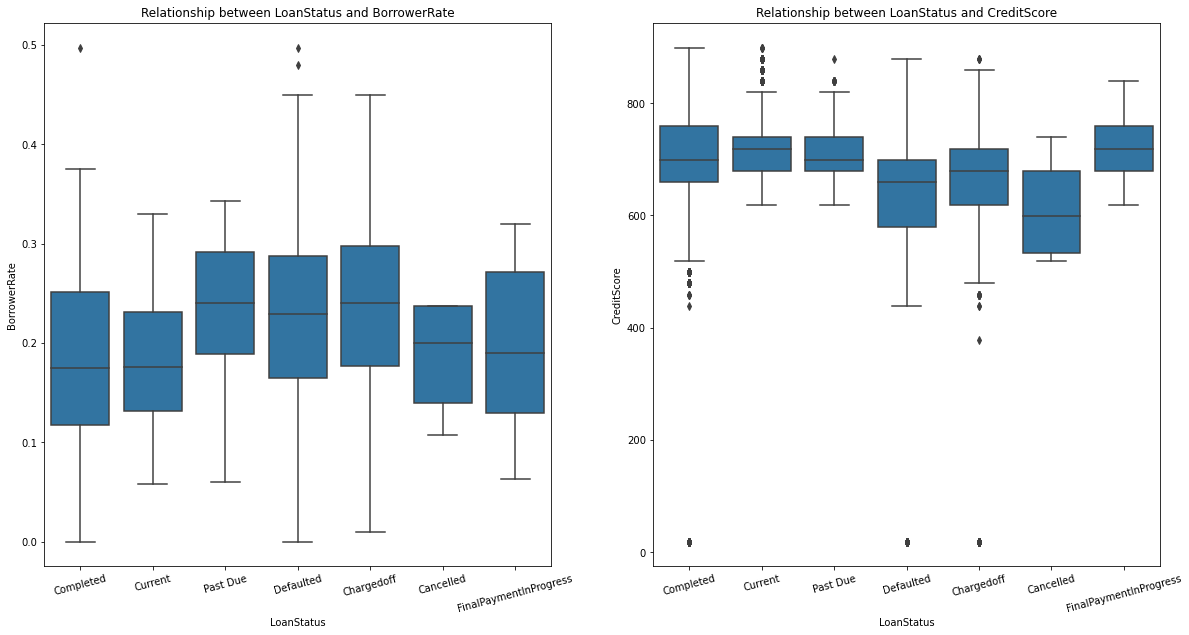

In [76]:
plt.figure(figsize=[20,10])

# Plot of LoanStatus and BorrowerRate
plt.subplot(1,2,1)
sb.boxplot(data = loan_subset, x = 'LoanStatus', y = 'BorrowerRate',color=base_color);
plt.xticks(rotation = 15)
plt.title('Relationship between LoanStatus and BorrowerRate');

# Plot of LoanStatus and CreditScore
plt.subplot(1,2,2)
sb.boxplot(data = loan_subset, x = 'LoanStatus', y = 'CreditScore',color=base_color);
plt.xticks(rotation = 15)
plt.title('Relationship between LoanStatus and CreditScore');

##### Observations:
1. The LoanStatus and BorrowerRate plot shows that Borrowers with pastdue, chargedoff and defaulted categories have the hightest interest rates compared to Borrowers who completed payment of their loans.

2. The LoanStatus and CreditScore plot shows that Borrowers who defaulted, chargedoff or cancelled had the lowest creditscore.

#### What is the relationship between **LoanStatus** and two qualitative variables **EmploymentStatus** and **IncomeRange**?

In [77]:
# Get the EmploymentStatus data into desirable format - a DataFrame
loan_employstatus = loan_subset.groupby(['LoanStatus', 'EmploymentStatus']).size()
# Use Series.reset_index() to convert a series into a dataframe object
loan_employstatus = loan_employstatus.reset_index(name = 'count')
# Use DataFrame.pivot() to rearrange the data, to have loanStatus on rows
loan_employstatus = loan_employstatus.pivot(index = 'LoanStatus', columns = 'EmploymentStatus', 
                                            values = 'count')

In [78]:
# Get the IncomeRange data into desirable format - a DataFrame
loan_income = loan_subset.groupby(['LoanStatus', 'IncomeRange']).size()
# Use Series.reset_index() to convert a series into a dataframe object
loan_income = loan_income.reset_index(name = 'count')
# Use DataFrame.pivot() to rearrange the data, to have loanStatus on rows
loan_income = loan_income.pivot(index = 'LoanStatus', columns = 'IncomeRange', 
                                            values = 'count')

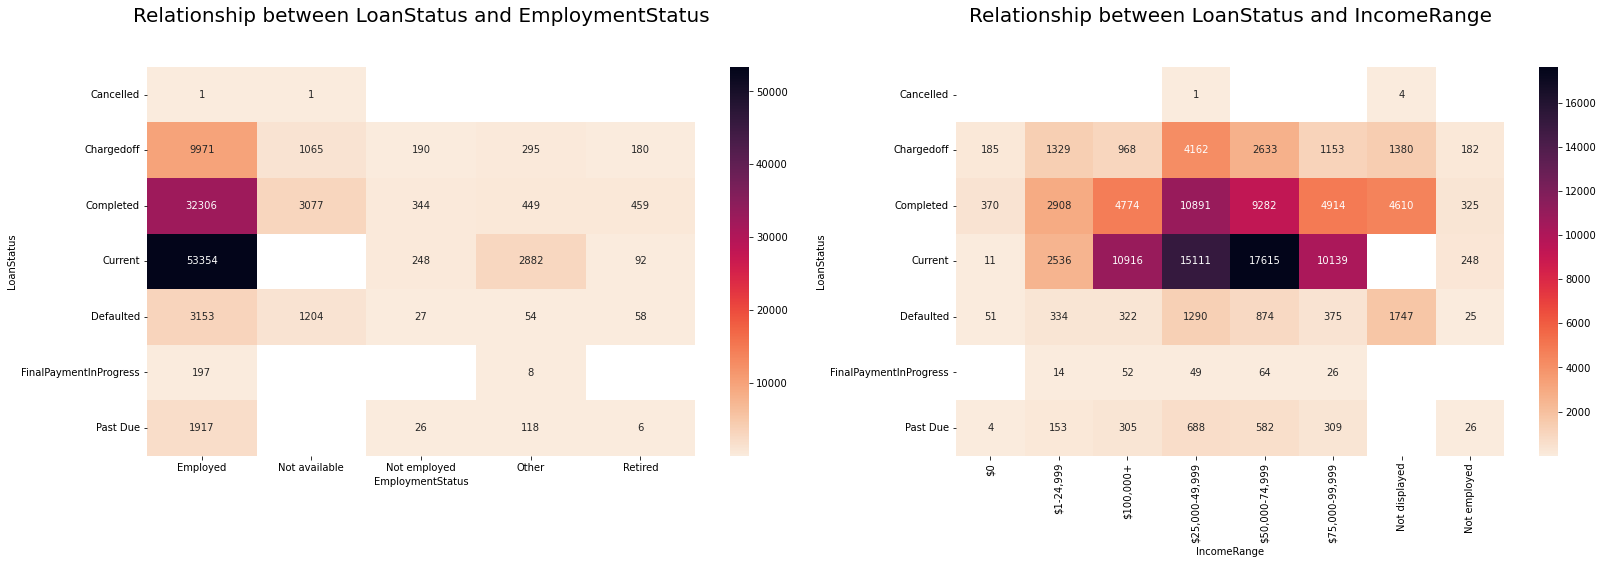

In [79]:
# Plot the heat maps of the categorical variables
plt.figure(figsize = [23, 8])

# Plot of LoanStatus and EmploymentStatus
plt.subplot(1, 2, 1)
cmap = sb.cm.rocket_r
sb.heatmap(loan_employstatus, annot=True, fmt = '.0f',cmap=cmap);
plt.title('Relationship between LoanStatus and EmploymentStatus', y=1.1, fontsize=20)

# Plot of LoanStatus and IncomeRange
plt.subplot(1, 2, 2)
sb.heatmap(loan_income, annot=True, fmt = '.0f',cmap=cmap);
plt.title('Relationship between LoanStatus and IncomeRange',y=1.1, fontsize=20)
plt.tight_layout()

##### Observations:
1.In all the LoanStatus categories, most borrowers are employed either full-time, part-time or self-employed. In essence, most of the loans are given to people who are employed.

2.There is no clear correlation between LoanStatus and IncomeRange as Borrower's Income range does not tell if you would complete or default in loan payment.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There is an expected relationship between LoanStatus and BorrowerRate as the plot shows that Borrowers who did not complete their loan payments had a higher interest rates and lower creditscores when compared to those Borrowers who completed their loan payments.
Also more of the loans where given to those who are employed. From here on I will not further explore IncomeRange has it has little or no relationsip with LoanStatus.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> BorrowerRate, BorrowerAPR, CreditScore, Investors, Term and LoanOriginalAmount had interesting negative or positive relationships with one another. From here on I will not be exploring variables with little or no correlation with other variables such as DebtToIncomeRatio and Recommendations. I will also not explore BorrowerAPR further because of its over-similarity with BorrowerRate.


## Multivariate Exploration



From the Bivariate insights. I would investigate the **LoanStatus** with **BorrowerRate** variables further has these 2 variables provided more insights. I would also explore some other variables in the data to compare with the variables such as **IsBorrowerHomeowner**, **Investors** and **CreditScore**.

#### What is the relationship between **LoanStatus**, **BorrowerRate** and **IsBorrowerHomeowner**?

Text(0.5, 1.0, 'Relationship between LoanStatus, BorrowerRate and IsBorrowerHomeowner')

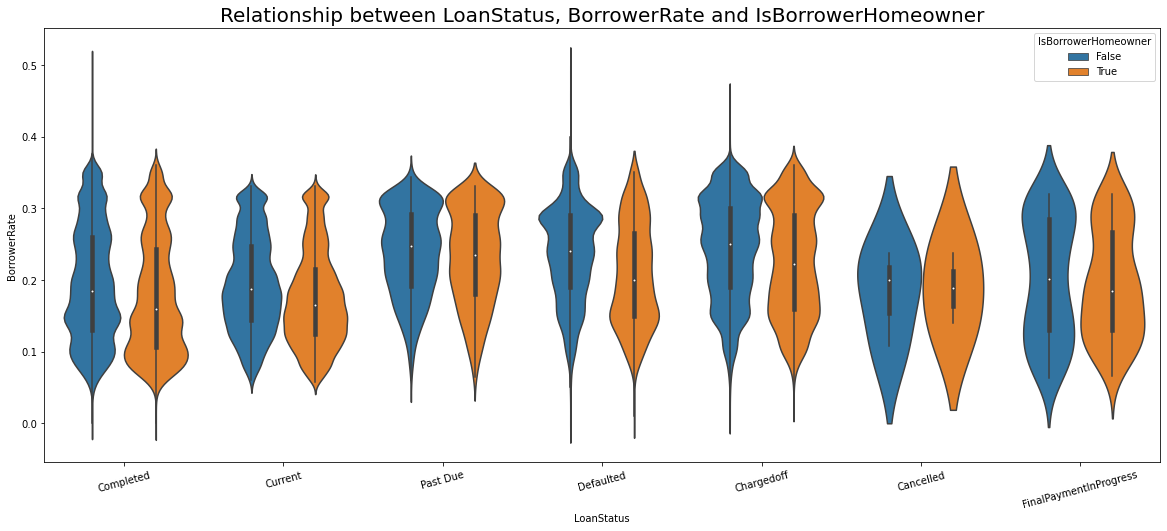

In [80]:
# Plot of BorrowerRate, IsBorrowerHomeowner and LoanStatus
plt.figure(figsize=[20,8])
sb.violinplot(data=loan_subset, x='LoanStatus', y='BorrowerRate', hue = 'IsBorrowerHomeowner')
plt.xticks(rotation=15);
plt.title('Relationship between LoanStatus, BorrowerRate and IsBorrowerHomeowner', fontsize=20)

##### Observation:

1. The plot shows ISBorrowerHomeowner against LoanStatus and BorrowerRate. From the plot we see that completed status has a lower borrower's rate compared to past due, defaulted or chargedoff. 
2. When IsBorrowerHomeOwner is added, we can see that most borrowers who own a home had lesser borrower rates compared to those that do not own homes. Even Lower borrower rates would also apply to those who completed and own homes.


#### What is the relationship between **LoanStatus**, **Investors** and **IsBorrowerHomeowner**?

Text(0.5, 1.0, 'Plot of IsBorrowerHomeowner against LoanStatus and Investors')

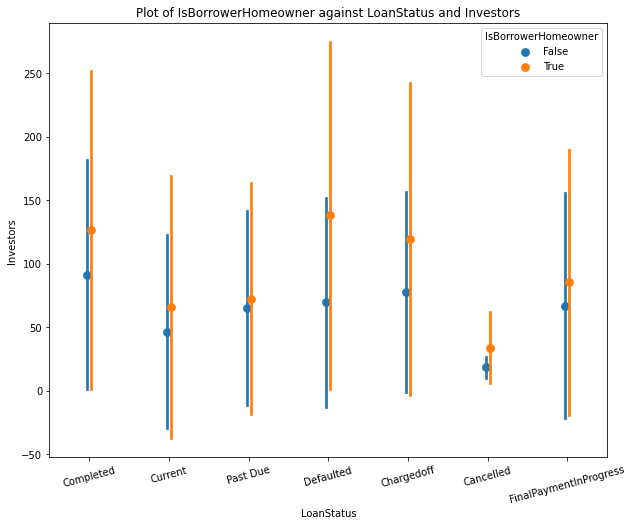

In [81]:
# Plot of LoanStatus, Investors and IsBorrowerHomeowner
plt.figure(figsize=[10,8])
base_color = sb.color_palette()[0]
sb.pointplot(data=loan_subset, x='LoanStatus', y='Investors', hue = 'IsBorrowerHomeowner', ci='sd', linestyles="", dodge=True)
plt.xticks(rotation=15);
plt.title('Plot of IsBorrowerHomeowner against LoanStatus and Investors')

##### Observation:

1. From the plot, we can see that Borrowers with completed loan payments had more investors compared to those who defaulted, past due or charged off.
2. When IsBorrowerHomeOwner is added, we can see most Borrowers who own homes had more investors than Borrowers who do not own homes.

#### What is the relationship of **LoanStatus** against **BorrowerRate** and **CreditScore**?

Text(0.5, 0.98, 'Relationship of LoanStatus against BorrowerRate and CreditScore')

<Figure size 1800x504 with 0 Axes>

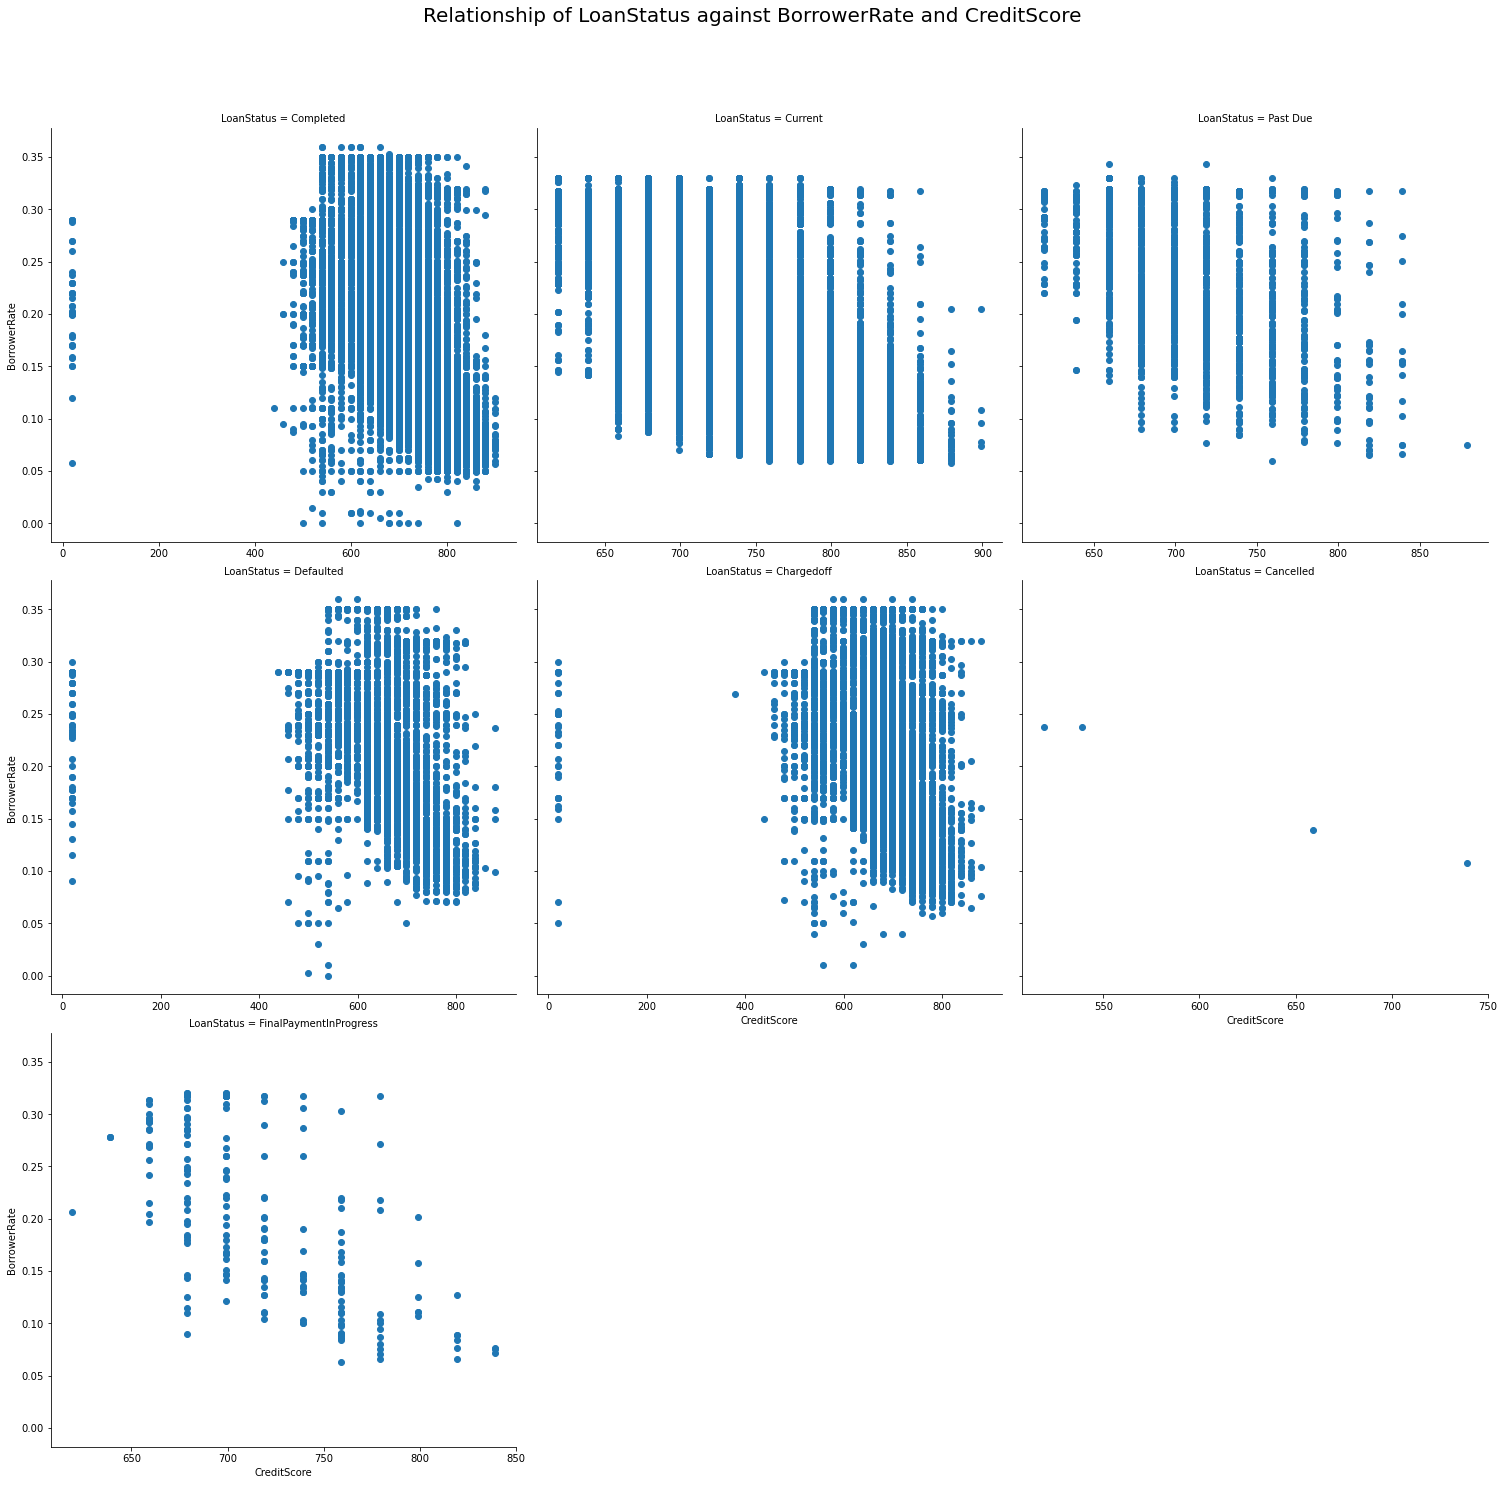

In [82]:
# Facet Plot of LoanStatus, BorrowerRate and CreditScore
plt.figure(figsize=[25,7])
g = sb.FacetGrid(data = loan_subset, col = 'LoanStatus', col_wrap=3, height=7, sharex=False)
g.map(plt.scatter, 'CreditScore', 'BorrowerRate')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Relationship of LoanStatus against BorrowerRate and CreditScore', fontsize=20)

##### Observation:
1. From the plot, we cans see that as Borrower's CreditScore increases, borrower's interest rates decreases.
2. There is no clear Relationship between Borrower's CreditScore and LoanStatus.

#### What is relationship between EmploymentStatus against LoanStatus and BorrowerRate?

/Users/fredavictor/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/fredavictor/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'Relationship of EmploymentStatus against BorrowerRate and LoanStatus')

<Figure size 2520x1080 with 0 Axes>

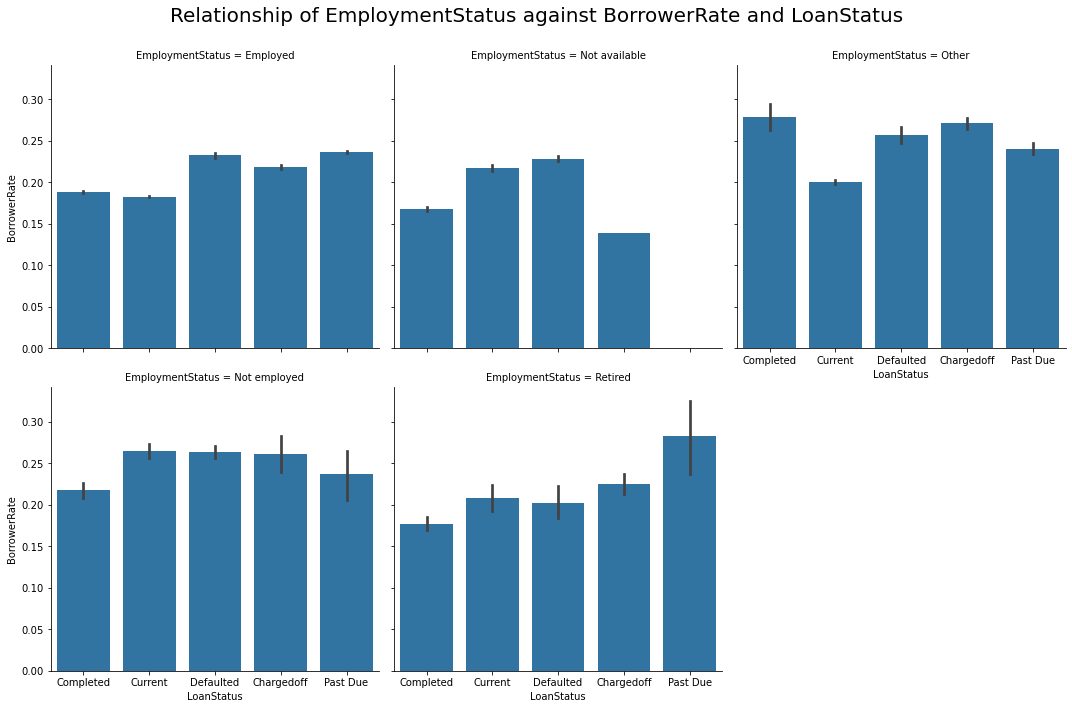

In [83]:
# Bar Plot of EmploymentStatus, LoanStatus and BorrowerRate
plt.figure(figsize=[35,15])
g = sb.FacetGrid(data = loan_subset, col = 'EmploymentStatus' , size=5, col_wrap =3)
g.map(sb.barplot, 'LoanStatus', 'BorrowerRate')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Relationship of EmploymentStatus against BorrowerRate and LoanStatus', fontsize=20)

##### Observations:

1. From the plot, we can see that Borrower's who are employed had lower interest rates when compared to whose who are not employed.

2. We can also see that Borrowers who completed their payments had a lower interest rates either when employed or not when compared to borrowers who did not complete their loans.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I extended my investigation of LoanStatus in this section by looking at the impact of BorrowerRate against several variables in the dataset. The multivariate exploration showed that Borrowers with completed status had a lower borrower's rate compared to past due, defaulted or chargedoff status.

> When IsBorrowerHomeOwner is added, we can see that most borrowers who own a home had lesser borrower rates compared to those that do not own homes. I also noticed a lower borrower rates for those who completed and own homes. Borrowers with completed loan payments also had more investors compared to those who defaulted, past due or charged off.In addition, as Borrower's CreditScore increases, borrower's interest rates decreases.

### Were there any interesting or surprising interactions between features?

> From investigation, it was interesting to see that you are most likely to get and complete payment of a loan when you employed. Interest rates also seems lower when employed. Looking back on the scatter plot, it was surprising to see that there was no clear relationship between Borrower's CreditScore and LoanStatus.

## Conclusions
1. The Loan data by Prosper had several interesting variables to explore and analyse. For this analysis I worked on 14 variables namely Term, LoanStatus, BorrowerAPR, BorrowerRate, ListingCategory, BorrowerState, EmploymentStatus, IsBorrowerHomeowner, CreditScoreRangeUpper, DebtToIncomeRatio, IncomeRange, LoanOriginalAmount, Recommendations and Investors.


2. Reflecting back to the question I want to answer 'what factors affect a loan’s outcome status in the dataset?', I can conclude that:
  - The highest distribution of the data in the LoanStatus is in the current status followed by completed status then the chargeoff. A bit of tidying was done in the LoanStatus variable to group past due statuses. 
 - Based on my analysis, the factors that affect a loan's outcome are BorrowerRate, EmploymentStatus, IsBorrowerHomeowner, and Investors. BorrowerRate was also influenced by CreditScore. To arrive at this conclusion, I had to analyse a series of univariate, bivariate and multivariate plots such as Countplots (grouped and tidied data), scatterplots (performed some log transformations), heatmap and pair grid correlation (defined numeric variables), categorical heatmaps(changed data formats), facetgrids, barplots and pointpoints.
 
 
3. My recommendation would be to give loans to people who had some investors, owned homes, listed what the loans are for and generally had some form of employment to avoid default loan payments.

